In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
%matplotlib inline

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.models import Sequential
from keras import optimizers
from sklearn.model_selection import  KFold


np.random.seed(42)

In [2]:
# Create arrays with filenames and lables
inFile = open("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/train-of.txt", "r")

all_images = []
all_labels = []
for i, v in enumerate(inFile):
    all_images.append(str(i)+".jpg")
    all_labels.append(float(v))

In [3]:
# train_images, val_images, test_images = all_images[: 14280], all_images[14280 : 18360], all_images[18360 :]
# train_labels, val_labels, test_labels = all_labels[: 14280], all_labels[14280 : 18360], all_labels[18360 :]

In [4]:
# import random

# rand_train = list(zip(train_images, train_labels))
# random.shuffle(rand_train)
# train_images, train_labels = zip(*rand_train)

# rand_val = list(zip(val_images, val_labels))
# random.shuffle(rand_val)
# val_images, val_labels = zip(*rand_val)

# test_rand = list(zip(test_images, test_labels))
# random.shuffle(test_rand)
# test_images, test_labels = zip(*test_rand)



In [5]:
# train_images = np.array(train_images)
# train_labels = np.array(train_labels)

# val_images = np.array(val_images)
# val_labels = np.array(val_labels)

# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [6]:
IMG_DIM = (150, 150)

# train_images_array = [img_to_array(load_img("/content/train-of/"+img, target_size=IMG_DIM)) for img in train_images]
# train_images_array = np.array(train_images_array)

# val_images_array = [img_to_array(load_img("/content/train-of/"+img, target_size=IMG_DIM)) for img in val_images]
# val_images_array = np.array(val_images_array)

# test_images_array = [img_to_array(load_img("/content/train-of/"+img, target_size=IMG_DIM)) for img in test_images]
# test_images_array = np.array(test_images_array)

all_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-of/"+img, target_size=IMG_DIM)) for img in all_images]
all_images_array = np.array(all_images_array)

In [7]:
# train_images_array = train_images_array.astype('float32')
# val_images_array  = val_images_array.astype('float32')
# test_images_array  = test_images_array.astype('float32')
# train_images_array /= 127.5
# train_images_array -= 1
# val_images_array /= 127.5
# val_images_array -= 1
# test_images_array /= 127.5
# test_images_array -= 1

all_images_array  = all_images_array.astype('float32')
all_images_array /= 255


In [8]:
model = Sequential()

model.add(Conv2D(32, (8, 8), (4,4), 'same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (8, 8), (4,4), 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (4, 4), (2,2), 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (2, 2), (1,1), 'same'))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(128))

model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mean_squared_error')

In [9]:
# train_images_array = train_images_array[:,:,:,[0,2]]
# val_images_array = val_images_array[:,:,:,[0,2]]
# test_images_array = test_images_array[:,:,:,[0,2]]

In [10]:
batch_size = 24
epochs = 3
input_shape = (150, 150, 3)
split_count = 5
kf = KFold(shuffle = False, n_splits = split_count)


In [11]:
train_images_array, test_images_array = all_images_array[: 17340], all_images_array[17340 :]
train_labels, test_labels = all_labels[: 17340], all_labels[17340 :]

In [12]:
for train_index, test_index in kf.split(train_images_array):
    history = model.fit(x=train_images_array[train_index], y=train_labels[train_index],
                      validation_data=(train_images_array[test_index], train_labels[test_index]),
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1)

Epoch 1/3
578/578 [==============================] - 94s 152ms/step - loss: 80.2437 - val_loss: 21.5414
Epoch 2/3
578/578 [==============================] - 69s 120ms/step - loss: 24.5132 - val_loss: 17.0416
Epoch 3/3
578/578 [==============================] - 67s 116ms/step - loss: 19.2048 - val_loss: 13.1398
Epoch 1/3
578/578 [==============================] - 107s 184ms/step - loss: 16.1395 - val_loss: 15.0424
Epoch 2/3
578/578 [==============================] - 95s 165ms/step - loss: 13.9746 - val_loss: 14.8854
Epoch 3/3
578/578 [==============================] - 96s 167ms/step - loss: 12.6054 - val_loss: 13.5978
Epoch 1/3
578/578 [==============================] - 114s 196ms/step - loss: 12.0135 - val_loss: 14.2790
Epoch 2/3
578/578 [==============================] - 80s 138ms/step - loss: 10.7459 - val_loss: 17.6859
Epoch 3/3
578/578 [==============================] - 74s 128ms/step - loss: 10.1737 - val_loss: 19.4532
Epoch 1/3
578/578 [==============================] - 99s 171ms

MemoryError: Unable to allocate 893. MiB for an array with shape (3468, 150, 150, 3) and data type float32

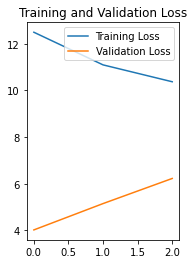

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
results = model.evaluate(test_images_array, test_labels, batch_size=batch_size)


128/128 [==============================] - 5s 35ms/step - loss: 18.5231
